In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving glass.xlsx to glass.xlsx


In [ ]:
df=pd.read_excel('glass.xlsx')
df

,Prepare a model for glass classification using Random Forest
0,Data Description:
1,RI : refractive index
2,Na: Sodium (unit measurement: weight percent i...
3,Mg: Magnesium
4,AI: Aluminum
5,Si: Silicon
6,K:Potassium
7,Ca: Calcium
8,Ba: Barium
9,Fe: Iron


In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data"
column_names = ['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']
glass_df = pd.read_csv(url, names=column_names, index_col=False)


In [ ]:
print("First few rows of the dataset:")
print(glass_df.head())


First few rows of the dataset:
   Id       RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0   1  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1   2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2   3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3   4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4   5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1


In [ ]:
print("\nMissing values in each column:")
print(glass_df.isnull().sum())



Missing values in each column:
Id      0
RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


In [ ]:
print("\nStatistical summary:")
print(glass_df.describe())


Statistical summary:
               Id          RI          Na          Mg          Al          Si  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean   107.500000    1.518365   13.407850    2.684533    1.444907   72.650935   
std     61.920648    0.003037    0.816604    1.442408    0.499270    0.774546   
min      1.000000    1.511150   10.730000    0.000000    0.290000   69.810000   
25%     54.250000    1.516522   12.907500    2.115000    1.190000   72.280000   
50%    107.500000    1.517680   13.300000    3.480000    1.360000   72.790000   
75%    160.750000    1.519157   13.825000    3.600000    1.630000   73.087500   
max    214.000000    1.533930   17.380000    4.490000    3.500000   75.410000   

                K          Ca          Ba          Fe        Type  
count  214.000000  214.000000  214.000000  214.000000  214.000000  
mean     0.497056    8.956963    0.175047    0.057009    2.780374  
std      0.652192    1.423153    0.497219   

In [ ]:
print("\nClass distribution in the target variable 'Type':")
print(glass_df['Type'].value_counts())


Class distribution in the target variable 'Type':
Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64


data visualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")



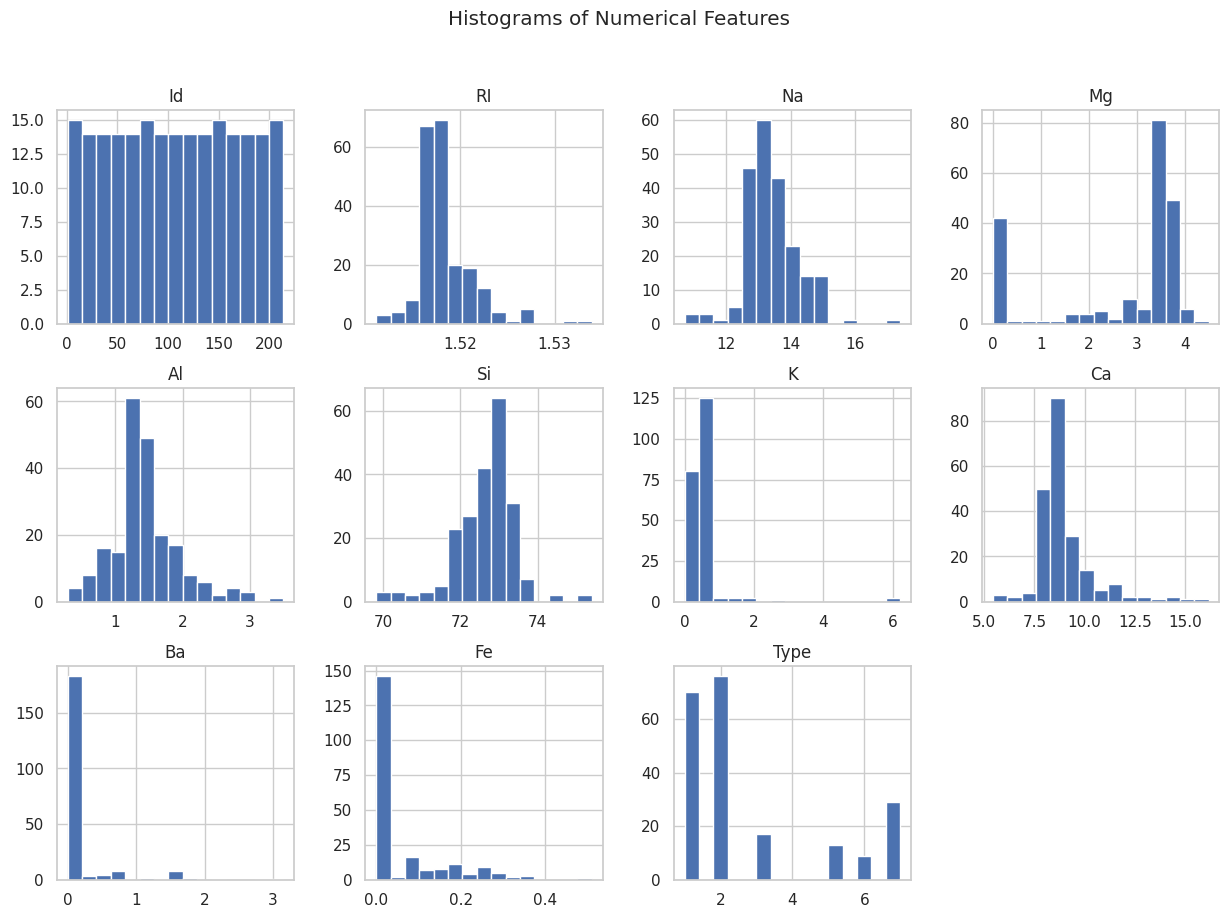

In [ ]:
glass_df.hist(bins=15, figsize=(15, 10), layout=(3, 4))
plt.suptitle("Histograms of Numerical Features")
plt.show()

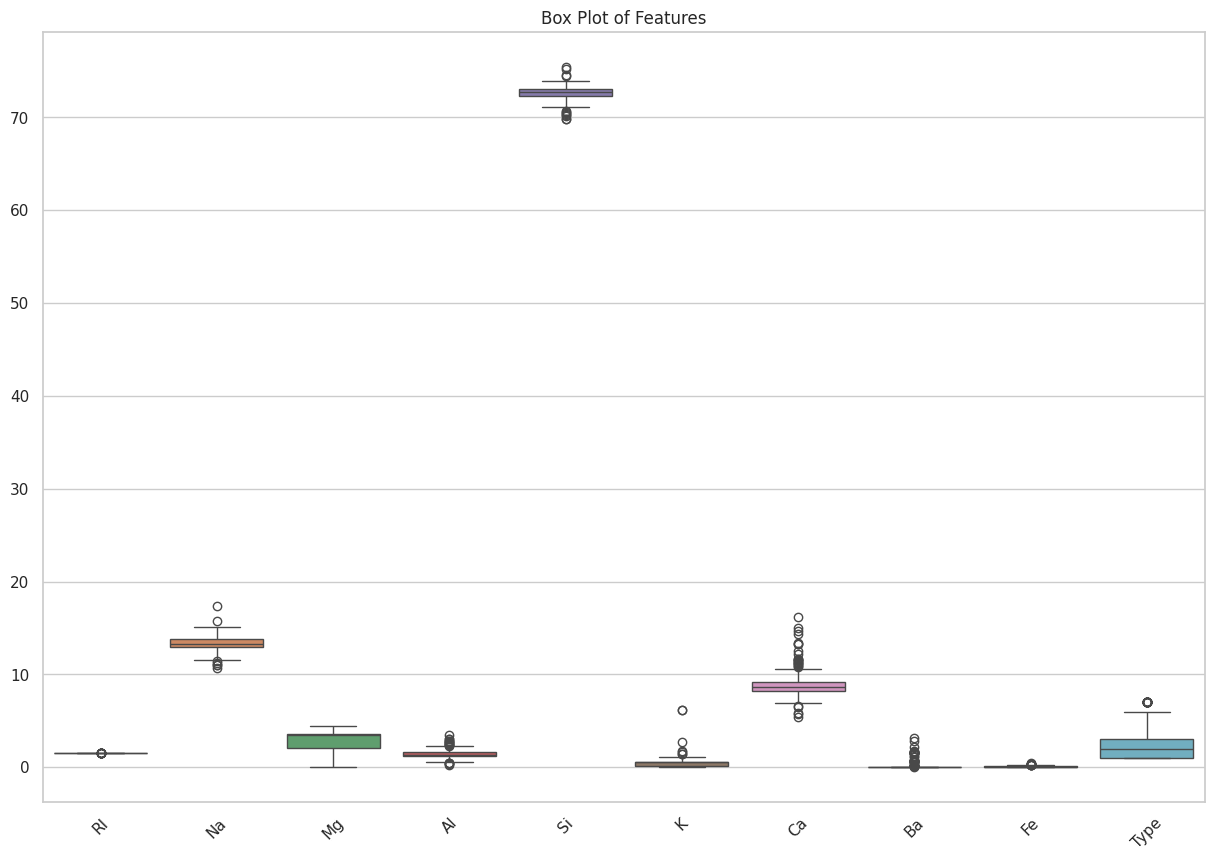

In [ ]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=glass_df.drop(columns=['Id']))
plt.title("Box Plot of Features")
plt.xticks(rotation=45)
plt.show()

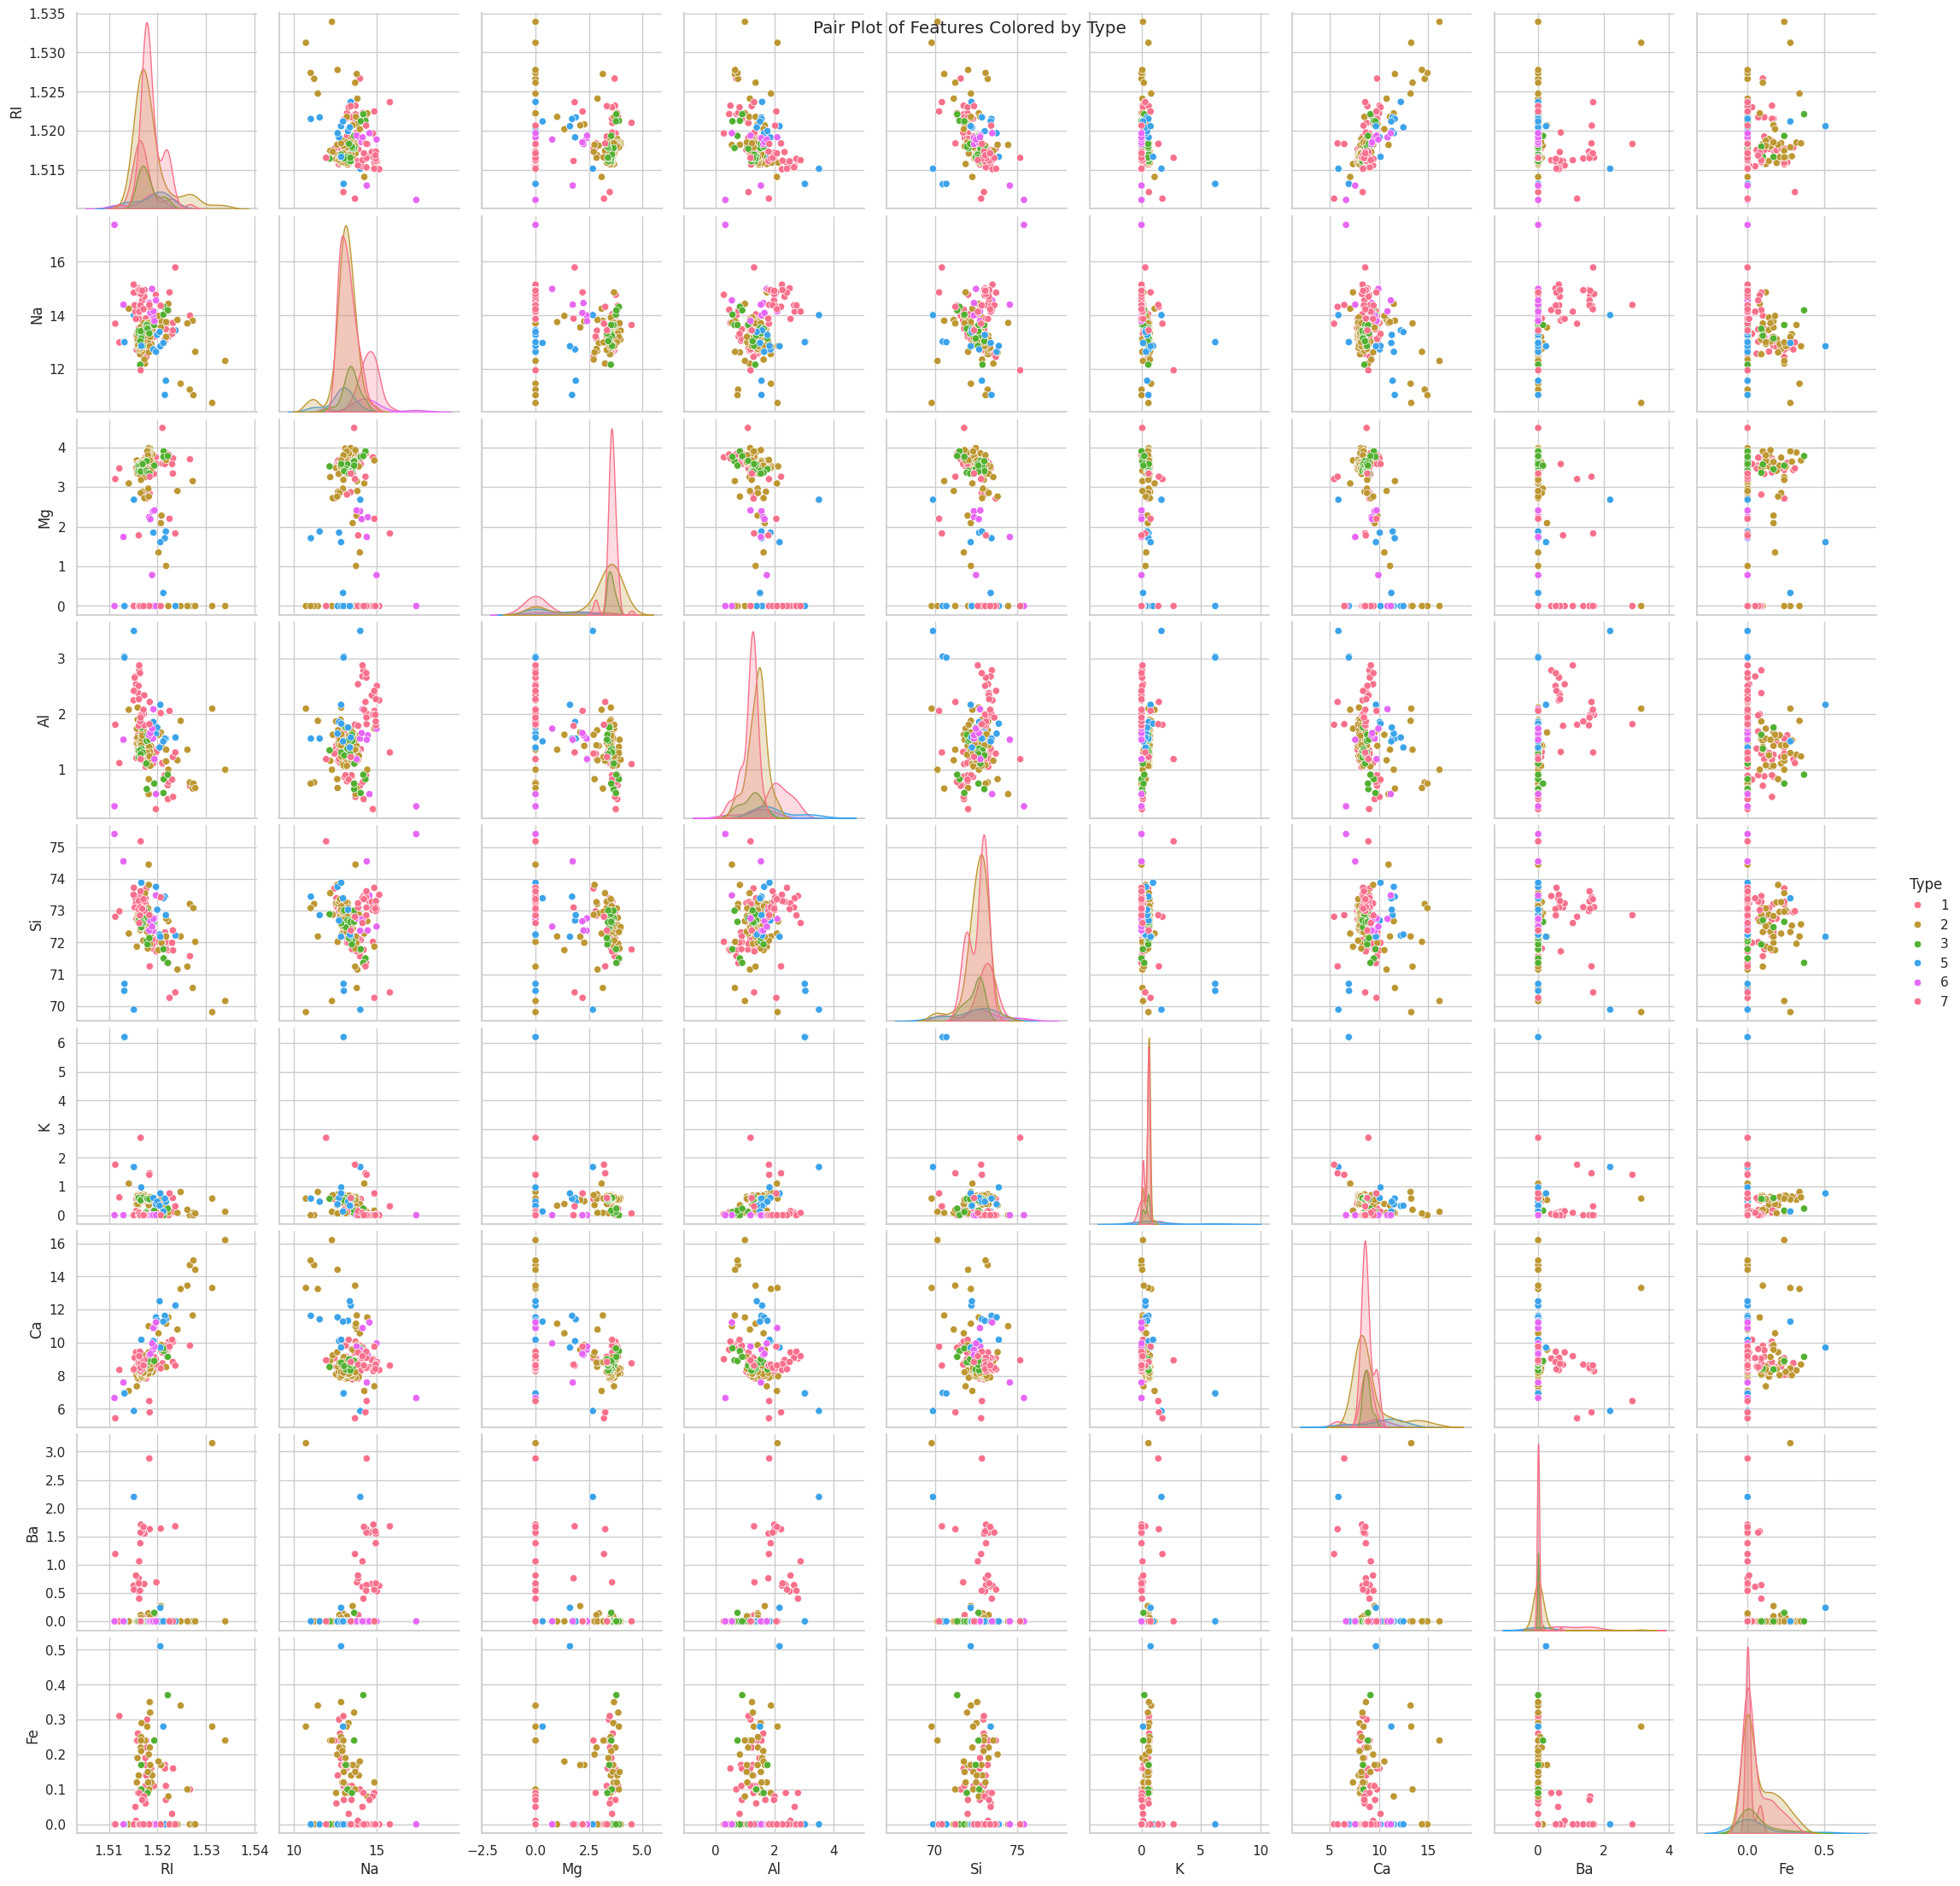

In [ ]:
sns.pairplot(glass_df.drop(columns=['Id']), hue="Type", palette="husl")
plt.suptitle("Pair Plot of Features Colored by Type")
plt.show()

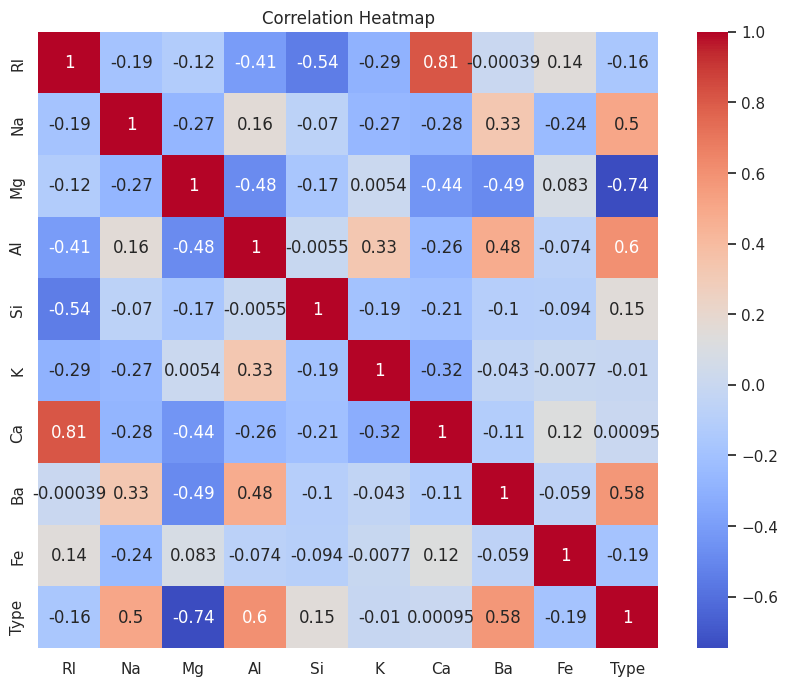

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(glass_df.drop(columns=['Id']).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

data preprocessing

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
features = glass_df.drop(columns=['Id', 'Type'])
target = glass_df['Type']
features
target

,Type
0,1
1,1
2,1
3,1
4,1
...,...
209,7
210,7
211,7
212,7


In [ ]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
features_scaled

array([[ 0.87286765,  0.28495326,  1.25463857, ..., -0.14576634,
        -0.35287683, -0.5864509 ],
       [-0.24933347,  0.59181718,  0.63616803, ..., -0.79373376,
        -0.35287683, -0.5864509 ],
       [-0.72131806,  0.14993314,  0.60142249, ..., -0.82894938,
        -0.35287683, -0.5864509 ],
       ...,
       [ 0.75404635,  1.16872135, -1.86551055, ..., -0.36410319,
         2.95320036, -0.5864509 ],
       [-0.61239854,  1.19327046, -1.86551055, ..., -0.33593069,
         2.81208731, -0.5864509 ],
       [-0.41436305,  1.00915211, -1.86551055, ..., -0.23732695,
         3.01367739, -0.5864509 ]])

In [ ]:
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns)
features_scaled_df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451
...,...,...,...,...,...,...,...,...,...
209,-0.704815,0.898681,-1.865511,2.881125,-0.052974,-0.640968,0.157088,1.783978,-0.586451
210,-0.500178,1.856097,-1.865511,1.094342,0.529374,-0.763919,-0.392276,2.852405,-0.586451
211,0.754046,1.168721,-1.865511,1.154570,0.995252,-0.763919,-0.364103,2.953200,-0.586451
212,-0.612399,1.193270,-1.865511,0.993960,1.241133,-0.763919,-0.335931,2.812087,-0.586451


In [ ]:
print("First few rows of the scaled features:")
print(features_scaled_df.head())

First few rows of the scaled features:
         RI        Na        Mg        Al        Si         K        Ca  \
0  0.872868  0.284953  1.254639 -0.692442 -1.127082 -0.671705 -0.145766   
1 -0.249333  0.591817  0.636168 -0.170460  0.102319 -0.026213 -0.793734   
2 -0.721318  0.149933  0.601422  0.190912  0.438787 -0.164533 -0.828949   
3 -0.232831 -0.242853  0.698710 -0.310994 -0.052974  0.112107 -0.519052   
4 -0.312045 -0.169205  0.650066 -0.411375  0.555256  0.081369 -0.624699   

         Ba        Fe  
0 -0.352877 -0.586451  
1 -0.352877 -0.586451  
2 -0.352877 -0.586451  
3 -0.352877 -0.586451  
4 -0.352877 -0.586451  


Random Forest Model Implementation

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features_scaled_df, target, test_size=0.3, random_state=42)
X_train, X_test, y_train, y_test

(           RI        Na        Mg        Al        Si         K        Ca  \
 137 -0.414363 -0.635638  0.650066  0.251140  0.399964  0.173582 -0.596526   
 65   0.866266  0.346326  0.629219 -0.652289 -0.894143 -0.625599  0.312037   
 108  1.272239  1.254643 -1.865511 -0.893204  0.024673 -0.610230  1.805179   
 181  0.169842  1.942018 -1.323480  0.592436 -0.195325 -0.763919  0.699409   
 31  -0.295542 -0.697011  0.566677 -0.612137  0.801137  0.096738 -0.286629   
 ..        ...       ...       ...       ...       ...       ...       ...   
 106  4.252673 -3.286943 -1.865511  1.315180 -3.676472  0.127475  3.058855   
 14  -0.242732 -0.979326  0.629219 -0.270841  0.827019  0.127475 -0.321844   
 92  -0.820336 -0.353324  0.504135  0.271217  0.788195 -0.656337 -0.399319   
 179  0.051020  0.837308 -0.343656  0.431826  0.024673 -0.763919  0.255692   
 102 -0.054599 -0.967052  0.052443 -1.234500  1.499954 -0.226008  0.326123   
 
            Ba        Fe  
 137 -0.352877 -0.586451  
 65  -0.

In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model

RandomForestClassifier(random_state=42)

In [ ]:
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf_model.predict(X_test)
y_pred

array([1, 7, 1, 7, 2, 2, 1, 2, 2, 3, 6, 2, 1, 2, 6, 5, 7, 1, 1, 6, 2, 7,
       7, 7, 3, 2, 1, 1, 2, 1, 1, 2, 3, 2, 1, 7, 5, 1, 1, 7, 2, 7, 1, 2,
       1, 6, 2, 1, 5, 1, 1, 1, 1, 2, 1, 2, 7, 2, 5, 1, 2, 2, 1, 7, 2])

Evaluate the model

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


In [ ]:
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Accuracy: 0.7692307692307693
Precision: 0.7661700618222356
Recall: 0.7692307692307693
F1-Score: 0.7601294829201807


In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           1       0.74      0.89      0.81        19
           2       0.75      0.65      0.70        23
           3       0.67      0.50      0.57         4
           5       0.75      0.50      0.60         6
           6       0.75      1.00      0.86         3
           7       0.91      1.00      0.95        10

    accuracy                           0.77        65
   macro avg       0.76      0.76      0.75        65
weighted avg       0.77      0.77      0.76        65



Bagging and Boosting Methods

In [ ]:
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier


In [ ]:
bagging_model = BaggingClassifier(base_estimator=RandomForestClassifier(random_state=42), n_estimators=50, random_state=42)
bagging_model.fit(X_train, y_train)
bagging_pred = bagging_model.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [ ]:

bagging_accuracy = accuracy_score(y_test, bagging_pred)
bagging_precision = precision_score(y_test, bagging_pred, average='weighted')
bagging_recall = recall_score(y_test, bagging_pred, average='weighted')
bagging_f1 = f1_score(y_test, bagging_pred, average='weighted')


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(f"\nBagging Model - Accuracy: {bagging_accuracy}, Precision: {bagging_precision}, Recall: {bagging_recall}, F1-Score: {bagging_f1}")



Bagging Model - Accuracy: 0.7538461538461538, Precision: 0.7292361484669178, Recall: 0.7538461538461538, F1-Score: 0.7274236874236873


In [ ]:
boosting_model = GradientBoostingClassifier(random_state=42)
boosting_model.fit(X_train, y_train)
boosting_pred = boosting_model.predict(X_test)
boosting_model
boosting_pred


array([1, 7, 1, 7, 2, 2, 1, 2, 2, 2, 6, 2, 1, 2, 6, 5, 7, 1, 1, 6, 2, 7,
       7, 7, 3, 2, 1, 1, 2, 1, 1, 2, 3, 2, 1, 7, 5, 3, 1, 2, 1, 7, 1, 2,
       1, 6, 2, 1, 2, 2, 1, 1, 1, 2, 1, 1, 7, 1, 2, 1, 2, 2, 1, 7, 2])

In [ ]:
boosting_accuracy = accuracy_score(y_test, boosting_pred)
boosting_precision = precision_score(y_test, boosting_pred, average='weighted')
boosting_recall = recall_score(y_test, boosting_pred, average='weighted')
boosting_f1 = f1_score(y_test, boosting_pred, average='weighted')
boosting_accuracy
boosting_precision
boosting_recall
boosting_f1

0.8043808387994434

In [ ]:
print(f"\nBoosting Model - Accuracy: {boosting_accuracy}, Precision: {boosting_precision}, Recall: {boosting_recall}, F1-Score: {boosting_f1}")


Boosting Model - Accuracy: 0.8153846153846154, Precision: 0.8349650349650349, Recall: 0.8153846153846154, F1-Score: 0.8043808387994434


questions

bagging and boosting

bagging

Bagging involves training multiple independent models (usually decision trees) on different subsets of data and then averaging their predictions (for regression) or using majority voting (for classification).

Bootstrap samples are created by randomly sampling the dataset with replacement.
Multiple base learners (like decision trees) are trained on these different bootstrap samples.
For classification, the final prediction is determined by majority vote, while for regression, the average prediction is used.



boosting
Boosting involves sequentially training models where each subsequent model focuses on correcting the errors made by the previous ones.

Models are trained one after another in sequence.
After each model is trained, it gives more weight to data points that were misclassified (or had higher errors).
The subsequent model tries to correct these errors by learning from the mistakes of the previous models.



Differences Between Bagging and Boosting:


Aspect	Bagging	Boosting
Training Strategy	Models are trained in parallel.	Models are trained sequentially.
Error Correction	Models do not depend on each other; no focus on prior model errors.	Each new model focuses on the errors of previous models.
Objective	Reduces variance (overfitting)	Reduces both bias and variance (improves accuracy)
Complexity	Simpler, as models are trained independently.	More complex, as models learn from previous errors.
Common Example	Random Forest	AdaBoost, Gradient Boosting, XGBoost
Performance on Noisy Data	Works better as it's more stable with noise.	Prone to overfitting if not carefully tuned.
